# Validation Set

## Problem

If we only split our data into train and test sets, we would have to use our tests set to test our model on each iteration, tweaking the hyperparameters until we get a satisfying result. However, this can cause the model to be overfitted to our test set.

## Solution

Split our data into a third partition, validation set. This set is used in each iteration to validate our model, and we can tweak our hyperparameters to try to get as good results on the validation set. When we think we have a good result, only then do we test the model on our test set.

# Coding exercise

Uses **California Housing dataset** to predict the `median_house_value`

In [1]:
# Import modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [2]:
# Load dataset from internet
train_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv")
test_df = pd.read_csv("https://download.mlcc.google.com/mledu-datasets/california_housing_test.csv")

train_df.head()
test_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.0,37.4,27.0,3885.0,661.0,1537.0,606.0,6.6,344700.0
1,-118.3,34.3,43.0,1510.0,310.0,809.0,277.0,3.6,176500.0
2,-117.8,33.8,27.0,3589.0,507.0,1484.0,495.0,5.8,270500.0
3,-118.4,33.8,28.0,67.0,15.0,49.0,11.0,6.1,330000.0
4,-119.7,36.3,19.0,1241.0,244.0,850.0,237.0,2.9,81700.0


In [3]:
# Scale label values
scale_factor = 1000.0

train_df["median_house_value"] /= scale_factor
test_df["median_house_value"] /= scale_factor

In [7]:
# Build model function
def build_model(my_learning_rate):
  model = tf.keras.models.Sequential()
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate), 
    loss="mean_squared_error",
    metrics=[tf.keras.metrics.RootMeanSquaredError()])
  return model

# Train model function
def train_model(model, df, feature, label, my_epochs, my_batch_size=None, my_validation_split=0.1):
  history = model.fit(
    x=df[feature],
    y=df[label],
    batch_size=my_batch_size,
    epochs=my_epochs,
    validation_split=my_validation_split
  )

  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  epochs = history.epoch

  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return epochs, rmse, history.history

In [10]:
# Plottinh function
def plot_the_loss_curve(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Epoch 1/70
136/136 [==============================] - 0s 714us/step - loss: 45329.7617 - root_mean_squared_error: 212.9079 - val_loss: 34728.8711 - val_root_mean_squared_error: 186.3568
Epoch 2/70
136/136 [==============================] - 0s 375us/step - loss: 26724.0078 - root_mean_squared_error: 163.4748 - val_loss: 19375.7812 - val_root_mean_squared_error: 139.1969
Epoch 3/70
136/136 [==============================] - 0s 368us/step - loss: 14464.3945 - root_mean_squared_error: 120.2680 - val_loss: 10230.5762 - val_root_mean_squared_error: 101.1463
Epoch 4/70
136/136 [==============================] - 0s 375us/step - loss: 8272.6250 - root_mean_squared_error: 90.9540 - val_loss: 6981.6011 - val_root_mean_squared_error: 83.5560
Epoch 5/70
136/136 [==============================] - 0s 383us/step - loss: 7056.4165 - root_mean_squared_error: 84.0025 - val_loss: 6894.4458 - val_root_mean_squared_error: 83.0328
Epoch 6/70
136/136 [==============================] - 0s 375us/step - loss: 70

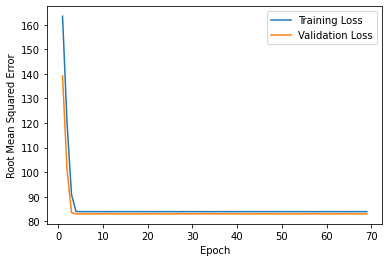

In [19]:
# Hyperparameters
learning_rate = 0.08
epochs = 70
batch_size = 100

# Validation split
validation_split = 0.2

my_feature = "median_income"
my_label = "median_house_value"

# Shuffle the train set, very important step
shuffled_train_df = train_df.reindex(np.random.permutation(train_df.index))

my_model = build_model(learning_rate)
epochs, rmse, history = train_model(
  my_model, shuffled_train_df, my_feature, my_label, epochs, batch_size, validation_split
)

plot_the_loss_curve(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])

In [21]:
# Evaluate the model with test set as a final step to verify it
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

# The root mean squared error for tain, validation and test are similar enough!

30/30 [==============================] - 0s 300us/step - loss: 7008.7798 - root_mean_squared_error: 83.7185
